# Visualize Marker Gene with Scanpy
https://scanpy-tutorials.readthedocs.io/en/latest/visualizing-marker-genes.html

In [2]:
import scanpy as sc
import pandas as pd
from matplotlib import rcParams

In [6]:
sc.set_figure_params(dpi=120, color_map='viridis')
sc.settings.verbosity = 2
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.16.4 scipy==1.3.0 pandas==0.24.2 scikit-learn==0.21.2 statsmodels==0.10.0 python-igraph==0.7.1 louvain==0.6.1


#### Data was obtained from 10x PBMC 68k dataset (https://support.10xgenomics.com/single-cell-gene-expression/datasets). The dataset was filtered and a sample of 700 cells and 765 highly variable genes was kept.

#### For this data, PCA and UMAP are already computed. Also, louvain clustering and cell cycle detection are present in pbmc.obs.

In [7]:
pbmc = sc.datasets.pbmc68k_reduced()

In [8]:
pbmc

AnnData object with n_obs × n_vars = 700 × 765 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

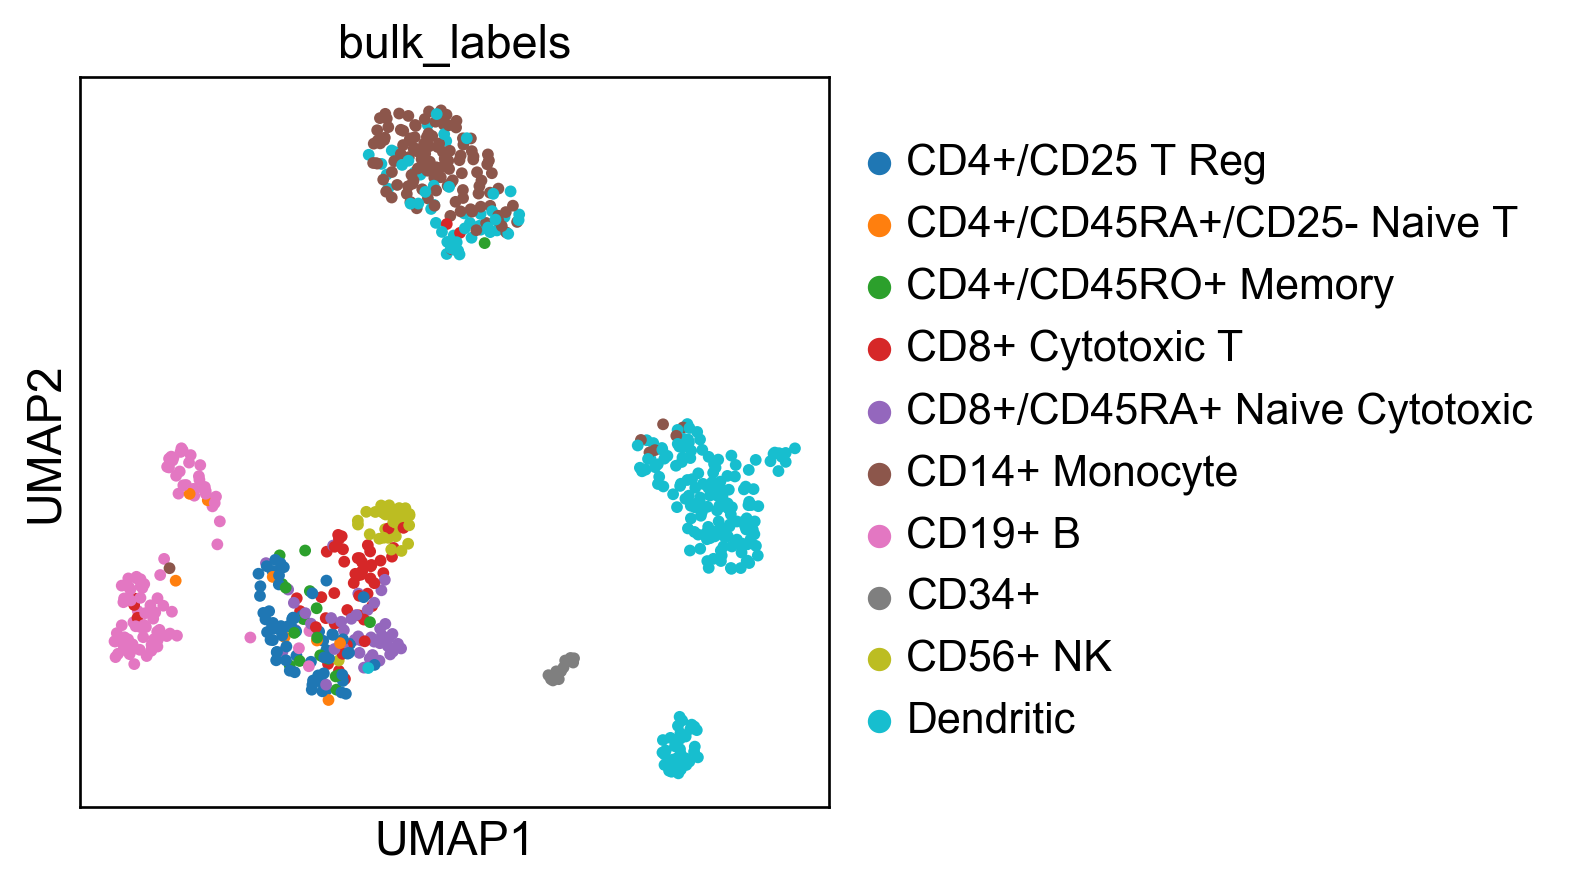

In [9]:
sc.pl.umap(pbmc, color=['bulk_labels'], s=50)

In [10]:
marker_genes = ['CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ',  'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1', 
                'FCGR3A', 'FCER1A', 'CST3']

## Stacked violins

#### Plot marker genes per cluster using stacked violin plots.

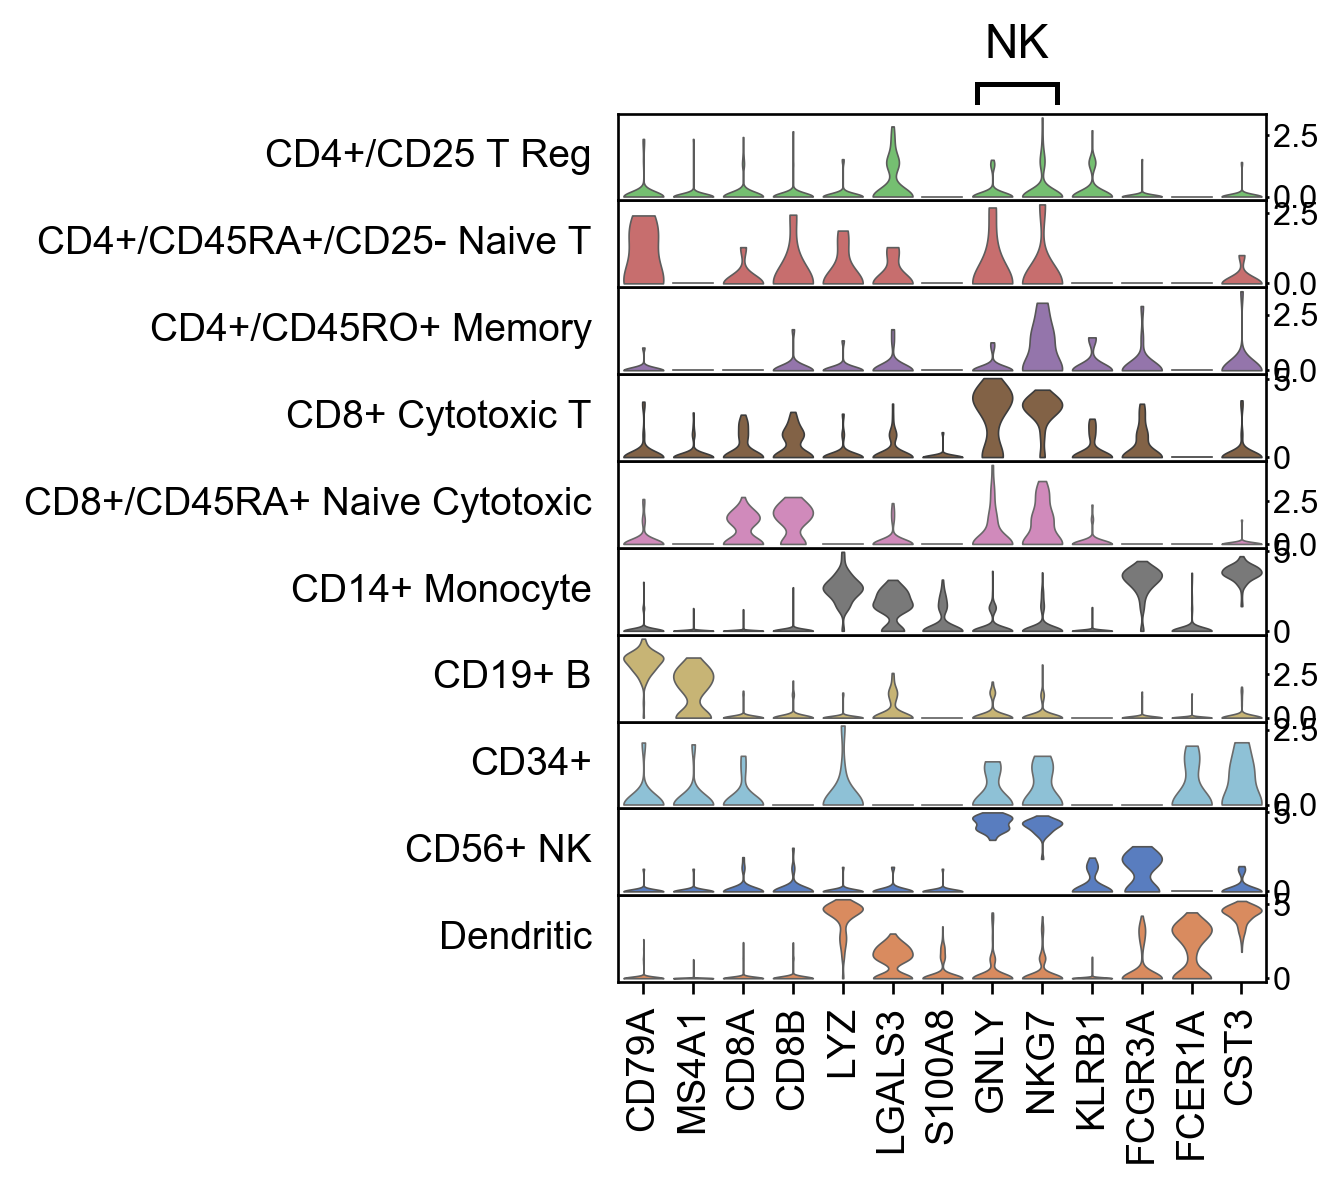

In [11]:
ax = sc.pl.stacked_violin(pbmc, marker_genes, groupby='bulk_labels',
                         var_group_positions=[(7, 8)], var_group_labels=['NK'])

#### Same as before but swapping the axes and with dendrogram (notice that the categories are reordered).

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_bulk_labels']`
categories: CD4+/CD25 T Reg, CD4+/CD45RA+/CD25- Naive T, CD4+/CD45RO+ Memory, etc.
var_group_labels: NK


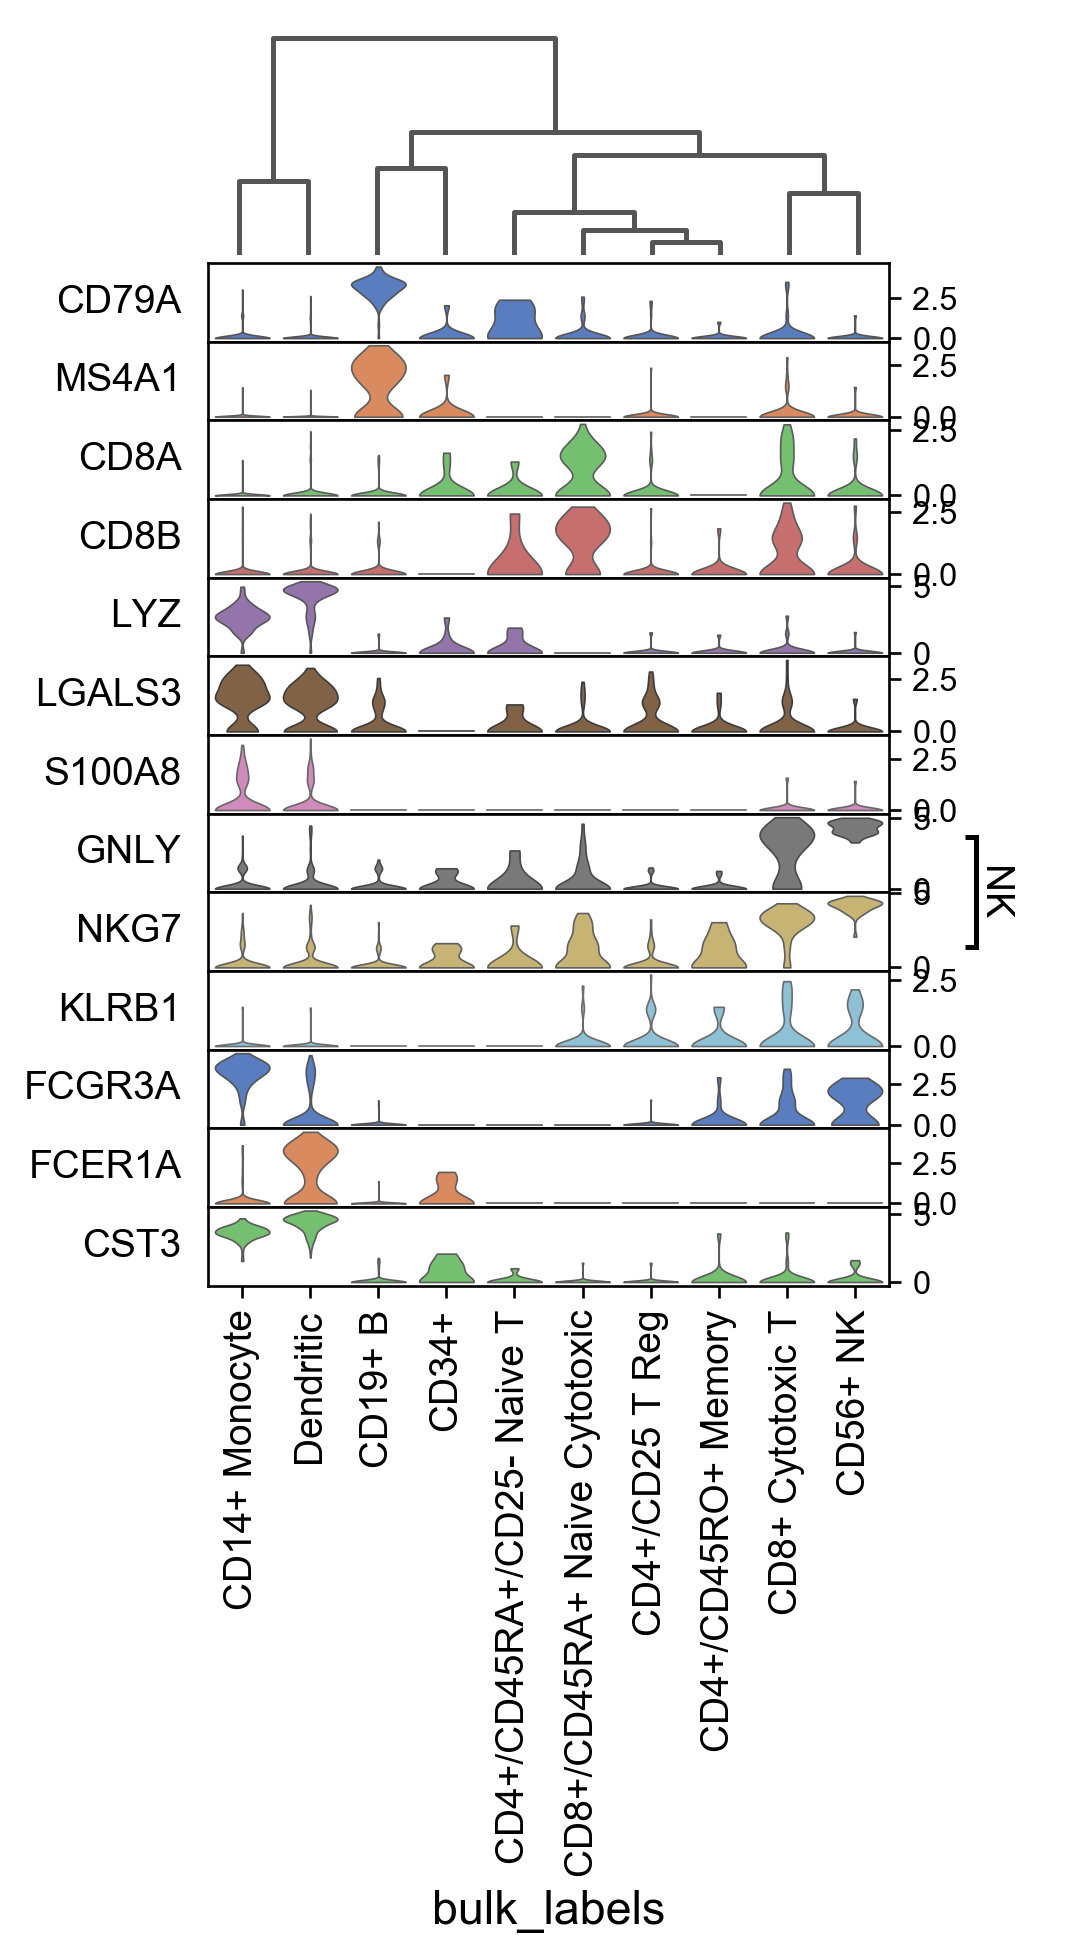

In [12]:
ax = sc.pl.stacked_violin(pbmc, marker_genes, groupby='bulk_labels', swap_axes=True,
                         var_group_positions=[(7, 8)], var_group_labels=['NK'], dendrogram=True)

## Dot plots

### The dotplot visualization provides a compact way of showing per group, the fraction of cells expressing a gene (dot size) and the mean expression of the gene in those cell (color scale).

### The use of the dotplot is only meaningful when the counts matrix contains zeros representing no gene counts. dotplot visualization does not work for scaled or corrected matrices in which cero counts had been replaced by other values.

### The marker genes list can be a list or a dictionary. If marker genes List is a dictionary, then plot shows the marker genes grouped and labelled

In [13]:

marker_genes_dict = {'B-cell': ['CD79A', 'MS4A1'],
                     'T-cell': 'CD3D',
                     'T-cell CD8+': ['CD8A', 'CD8B'],
                     'NK': ['GNLY', 'NKG7'],
                     'Myeloid': ['CST3', 'LYZ'],
                     'Monocytes': ['FCGR3A'],
                     'Dendritic': ['FCER1A']}

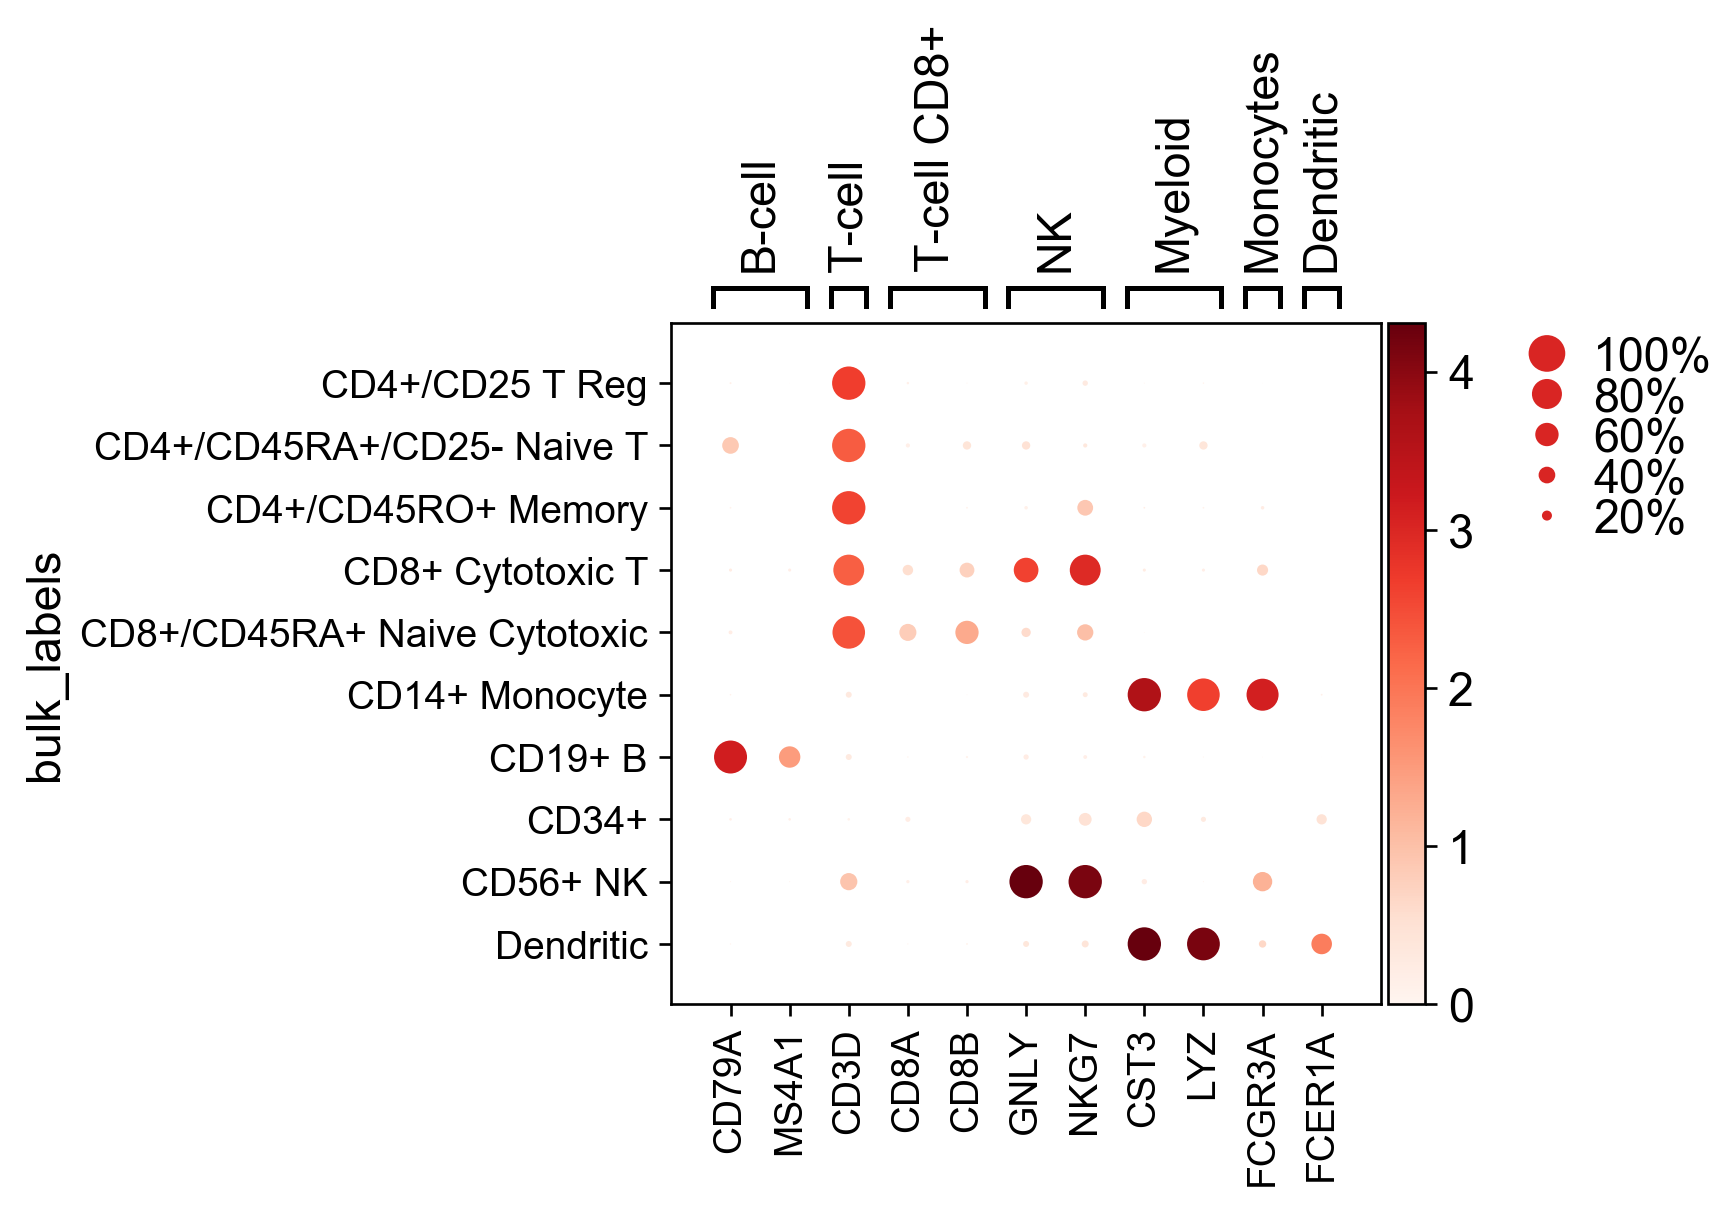

In [14]:
# use marker genes as dict to group them
ax = sc.pl.dotplot(pbmc, marker_genes_dict, groupby='bulk_labels')

To show some of the options of dot plot, here we add:

- dendrogram=True show dendrogram and reorder group by categories based on dendrogram order
- dot_max=0.5 plot largest dot as 50% or more cells expressing the gene
- dot_min=0.3 plot smallest dot as 30% or less cells expressing the gene
-  standard_scale=’var’ normalize the mean gene expression values between 0 and 1

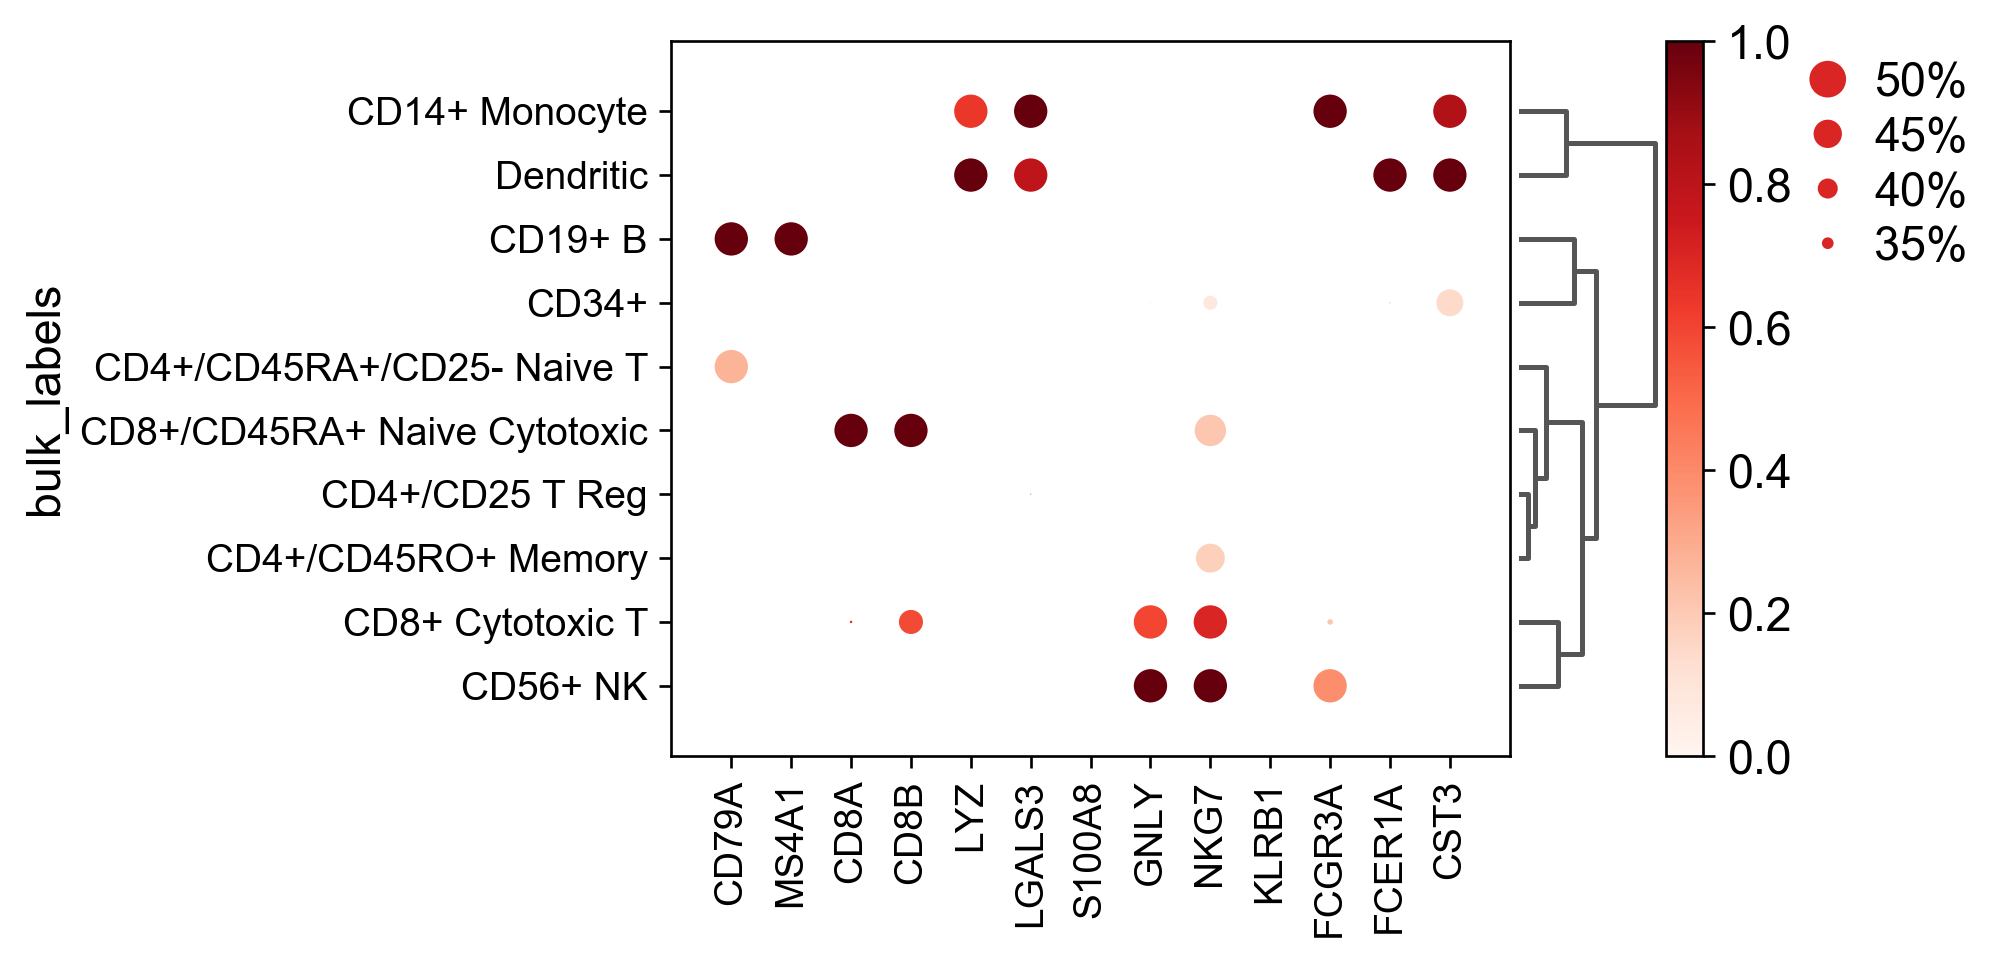

In [15]:
ax = sc.pl.dotplot(pbmc, marker_genes, groupby='bulk_labels', dendrogram=True, dot_max=0.5, dot_min=0.3, standard_scale='var')

In the next plot we added:

- smallest_dot=40 To increase the size of the smallest dot
- color_map=’Blues’ To change the colormap palette
-  figsize=(8,5) To change the default figure size

categories: CD4+/CD25 T Reg, CD4+/CD45RA+/CD25- Naive T, CD4+/CD45RO+ Memory, etc.
var_group_labels: B-cell, T-cell, T-cell CD8+, etc.


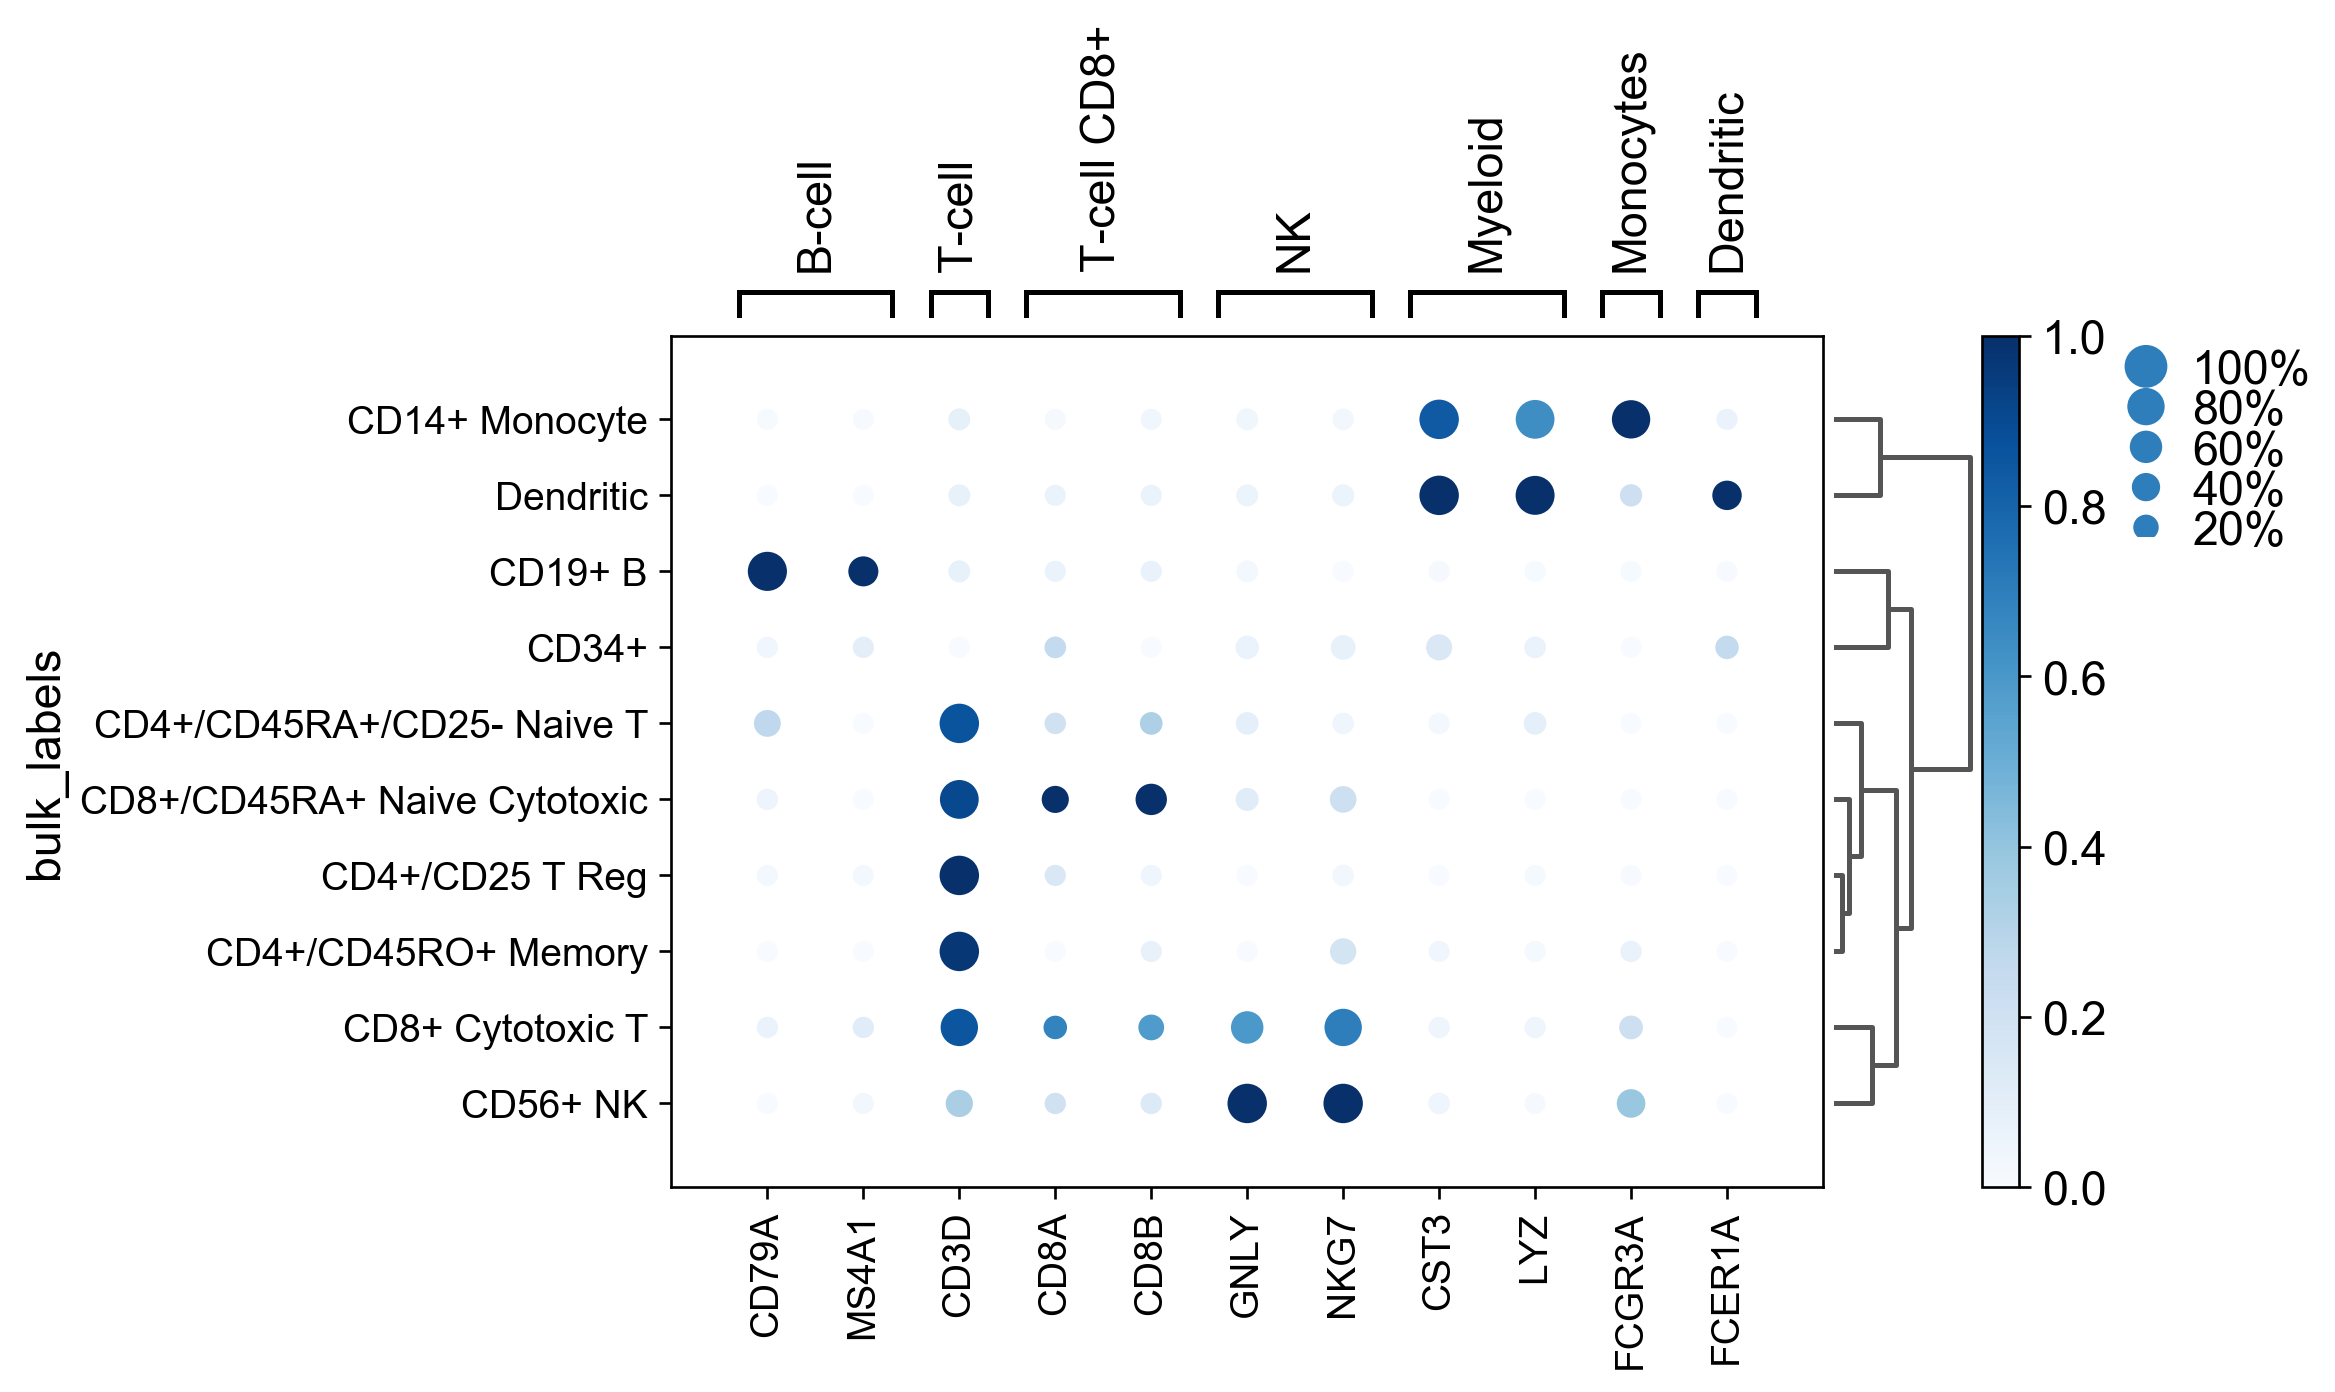

In [16]:
ax = sc.pl.dotplot(pbmc, marker_genes_dict, groupby='bulk_labels', dendrogram=True,
                   standard_scale='var', smallest_dot=40, color_map='Blues', figsize=(8,5))

#### Here we add grouping labels for genes using var_group_positions and var_group_labels

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain']`
categories: 0, 1, 2, etc.
var_group_labels: B cells, dendritic


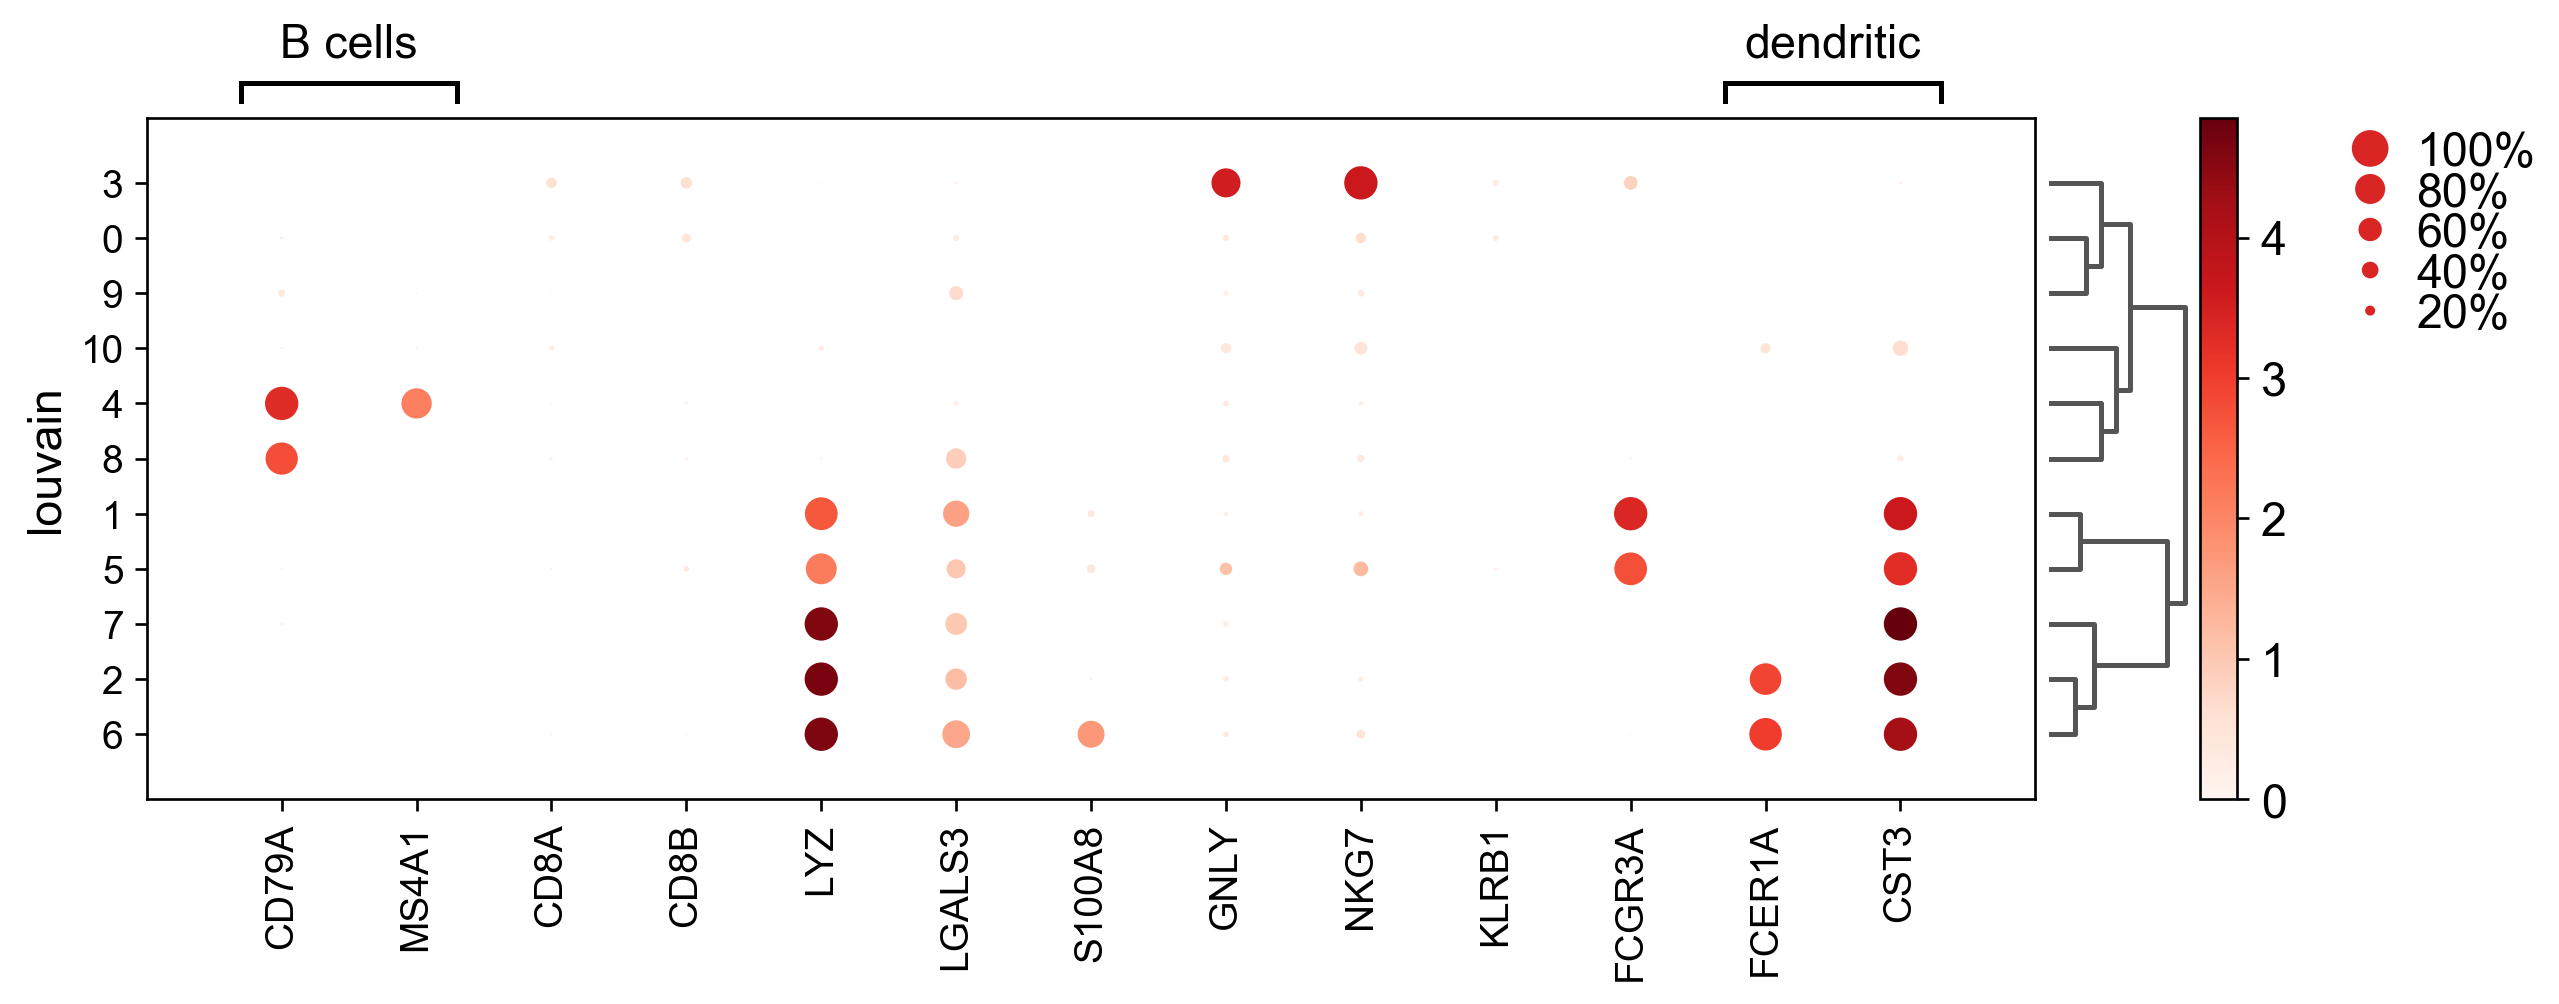

In [17]:
ax = sc.pl.dotplot(pbmc, marker_genes, groupby='louvain',
              var_group_positions=[(0,1), (11, 12)],
              var_group_labels=['B cells', 'dendritic'],
              figsize=(12,4), var_group_rotation=0, dendrogram='dendrogram_louvain')

## Matrix plots

#### The matrixplot shows the mean expression of a gene in a group by category as a heatmap. In contrast to dotplot, the matrix plot can be used with corrected and/or scaled counts. By default raw counts are used.

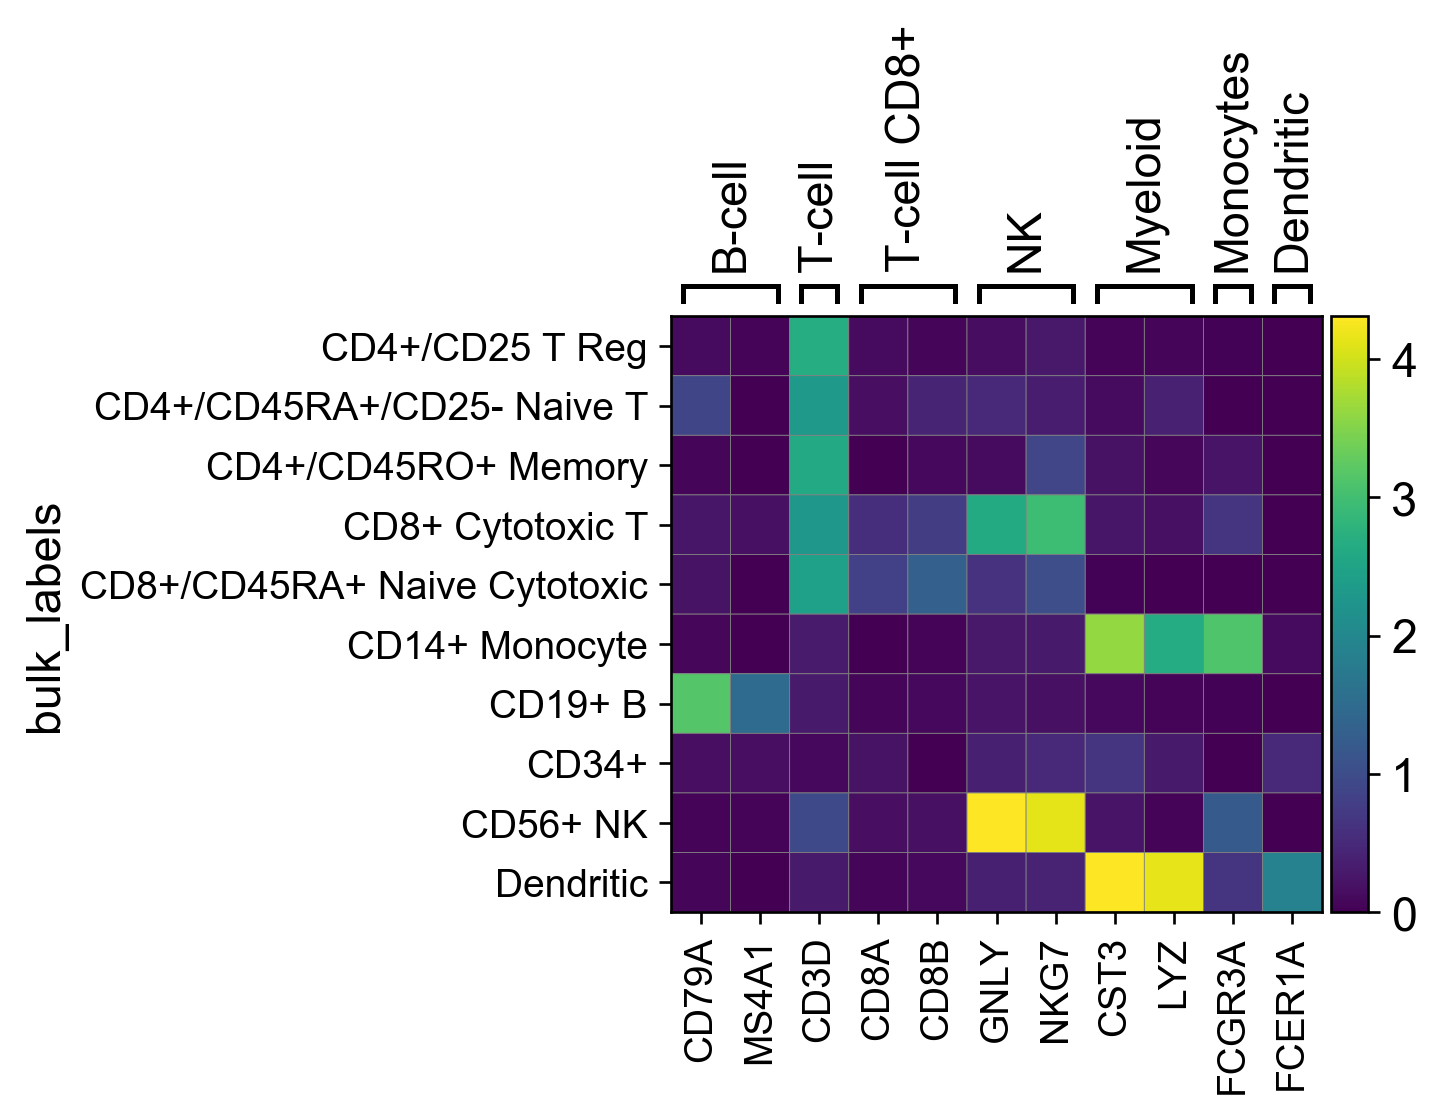

In [18]:
gs = sc.pl.matrixplot(pbmc, marker_genes_dict, groupby='bulk_labels')


#### Next we add a dendrogram and scale the gene expression values between 0 and 1 using standar_scale=var

categories: CD4+/CD25 T Reg, CD4+/CD45RA+/CD25- Naive T, CD4+/CD45RO+ Memory, etc.
var_group_labels: B-cell, T-cell, T-cell CD8+, etc.


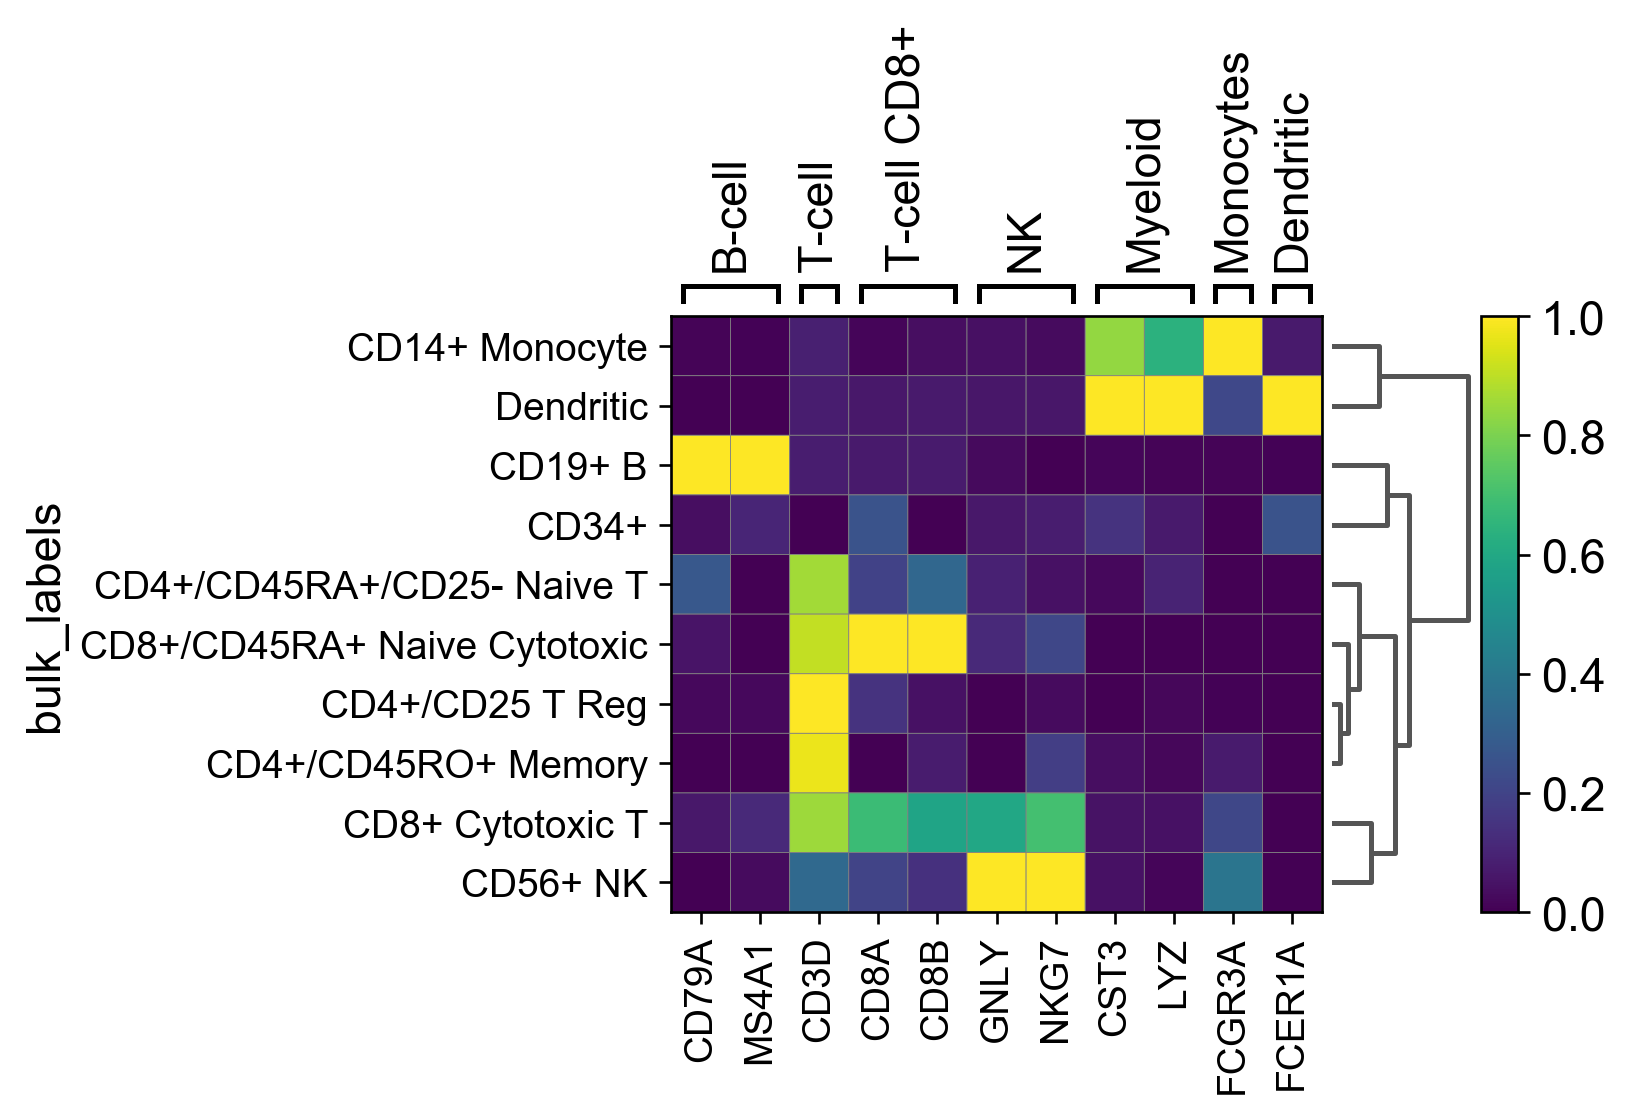

In [20]:
gs = sc.pl.matrixplot(pbmc, marker_genes_dict, groupby='bulk_labels', dendrogram=True, standard_scale='var')


In [22]:
# to use the 'non-raw' data we select marker genes present in this data.
marker_genes_2 = [x for x in marker_genes if x in pbmc.var_names]

#### In the next figure we use: * use_raw=False to use the scaled values (after sc.pp.scale) stored in pbmc.X * vmin=-3, vmax=3, cmap=’bwr’ to select the max and min for the diverging color map ‘bwr’ * swap_axes=True to show genes in rows * figsize=(5,6) to modify the defult figure size

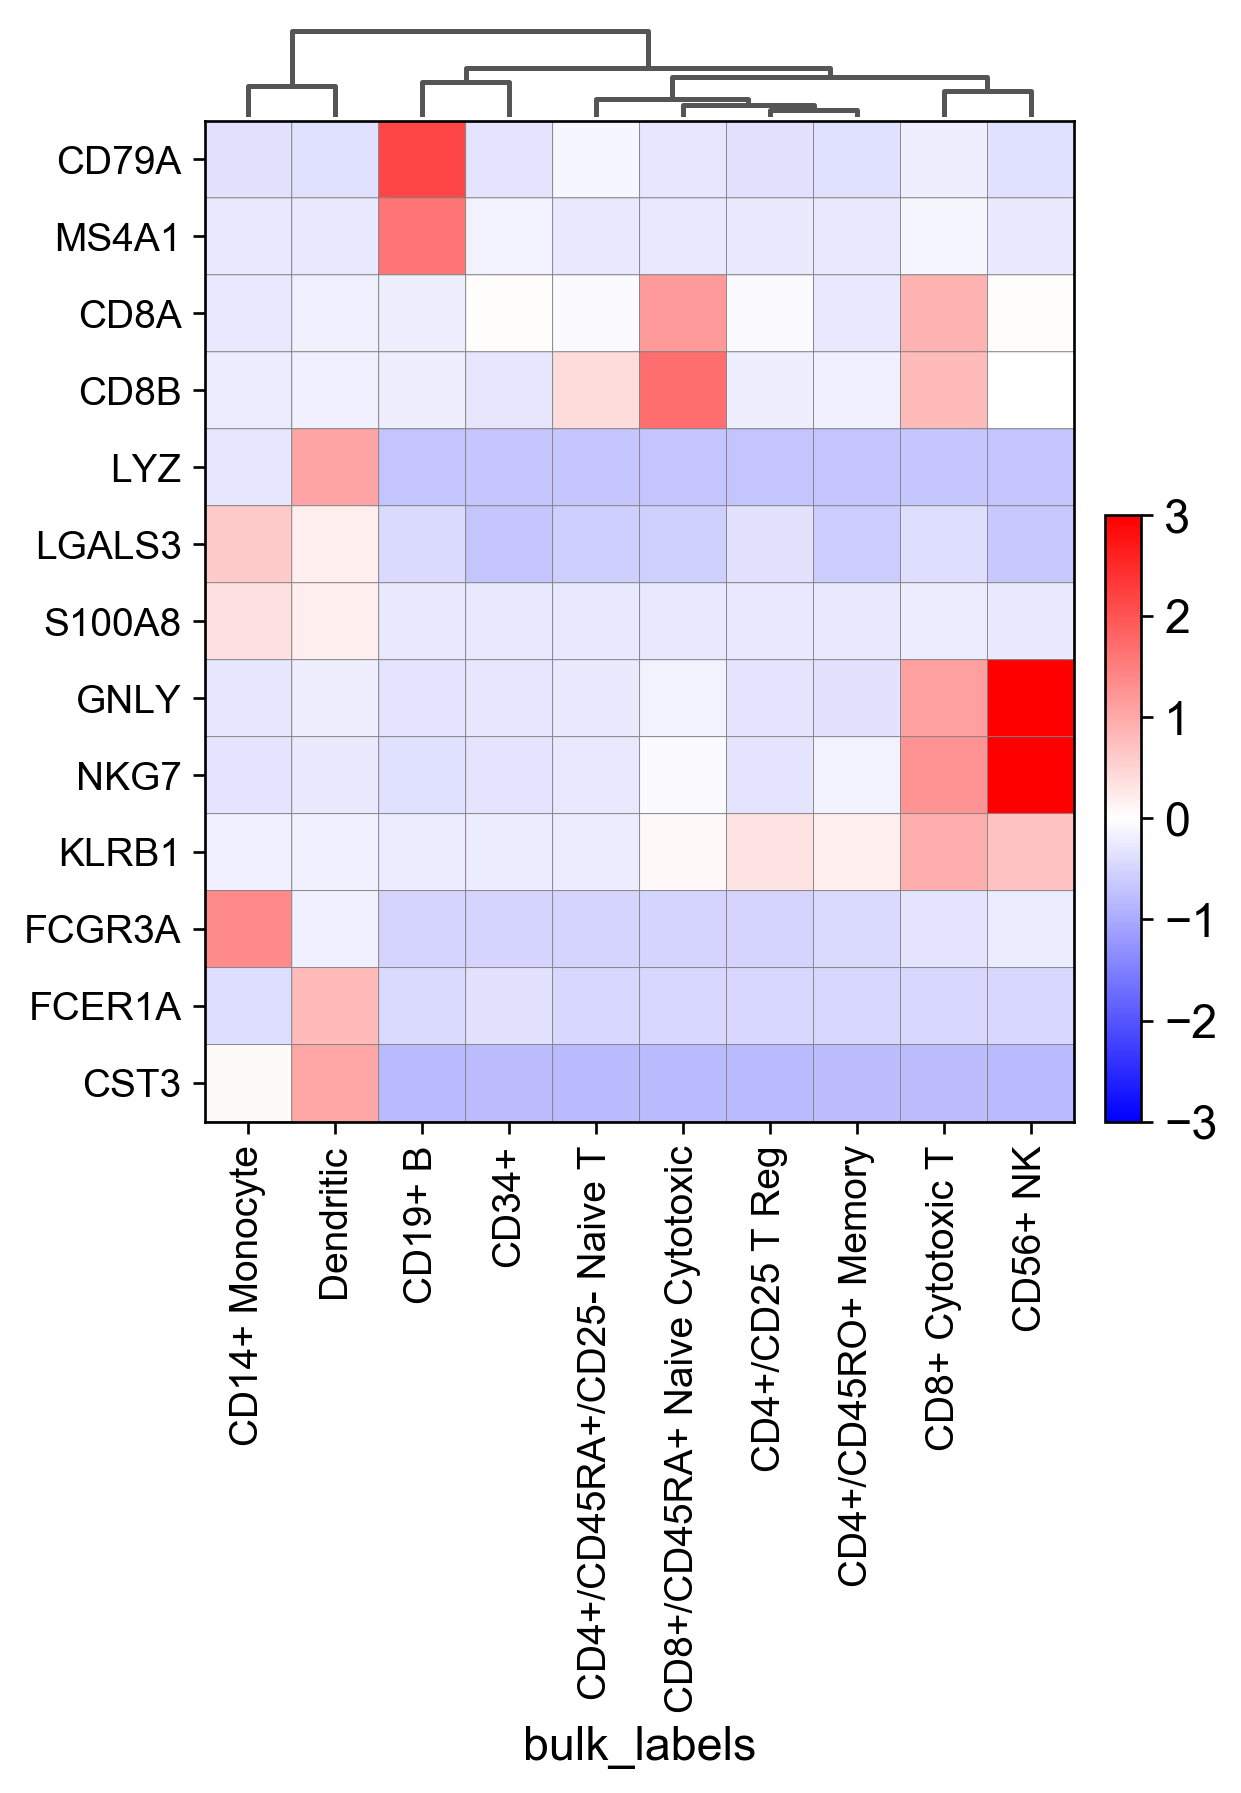

In [23]:
gs = sc.pl.matrixplot(pbmc, marker_genes_2, groupby='bulk_labels', dendrogram=True,
                      use_raw=False, vmin=-3, vmax=3, cmap='bwr',  swap_axes=True, figsize=(5,6))

## Heatmaps

#### Heatmaps do not collapse cells as in previous plots. Instead, each cells is shown in a row (or columm if swap_axes=True). The groupby information can be added and is shown using the same color code found for sc.pl.umap or any other scatter plot.

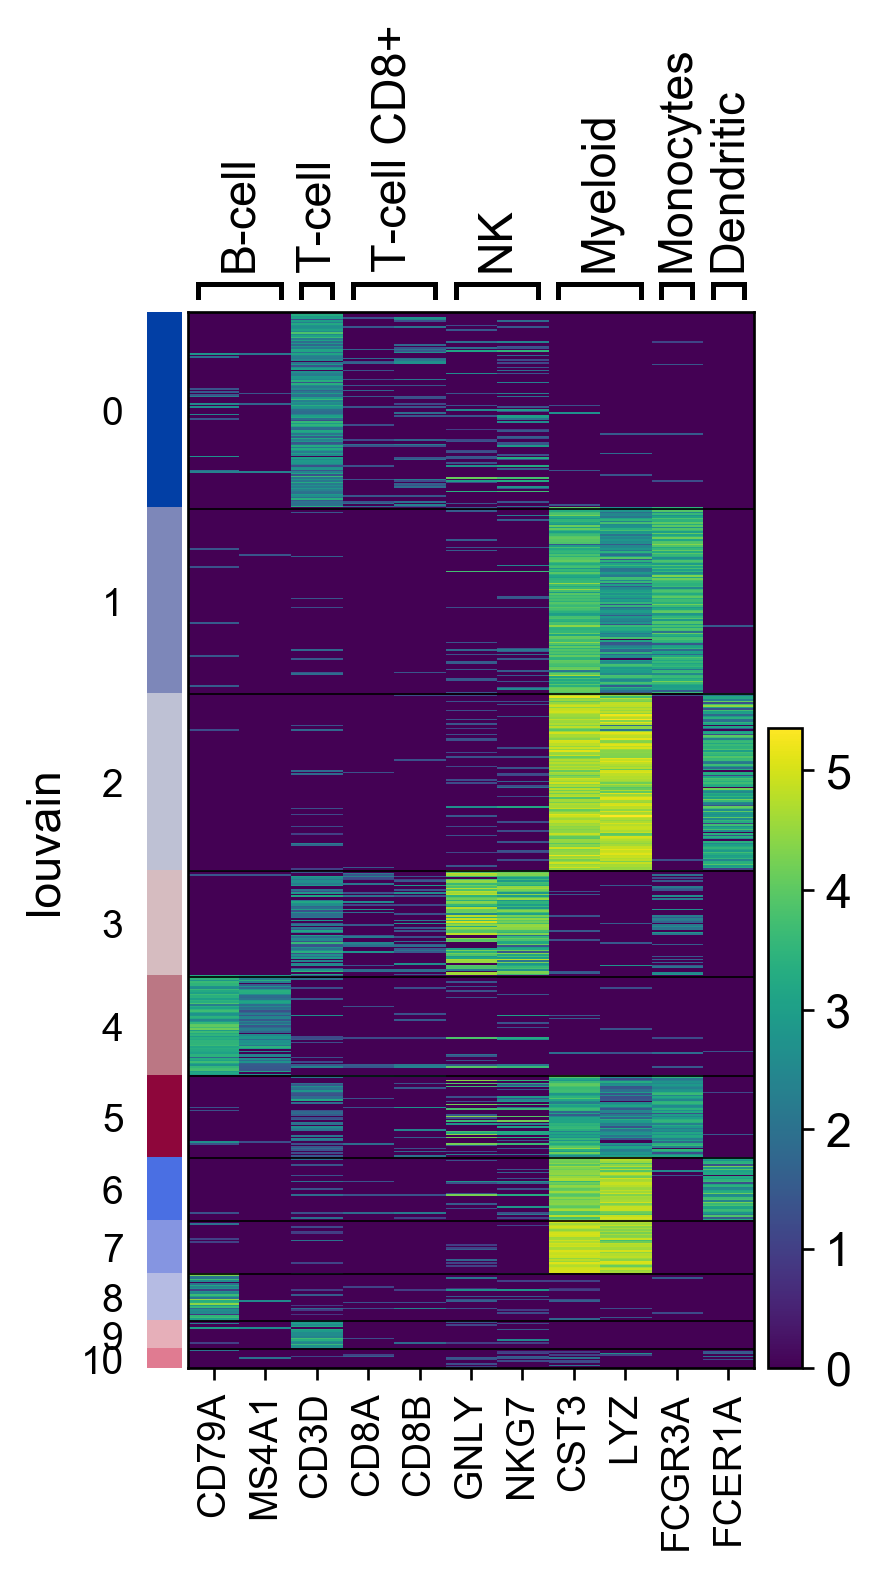

In [24]:
ax = sc.pl.heatmap(pbmc,marker_genes_dict, groupby='louvain')

#### Same as before but using use_raw=False to use the scaled data stored in pbmc.X. Some genes are highlighted using var_groups_positions and var_group_labels and the figure size is adjusted.

categories: 0, 1, 2, etc.
var_group_labels: B cells, dendritic


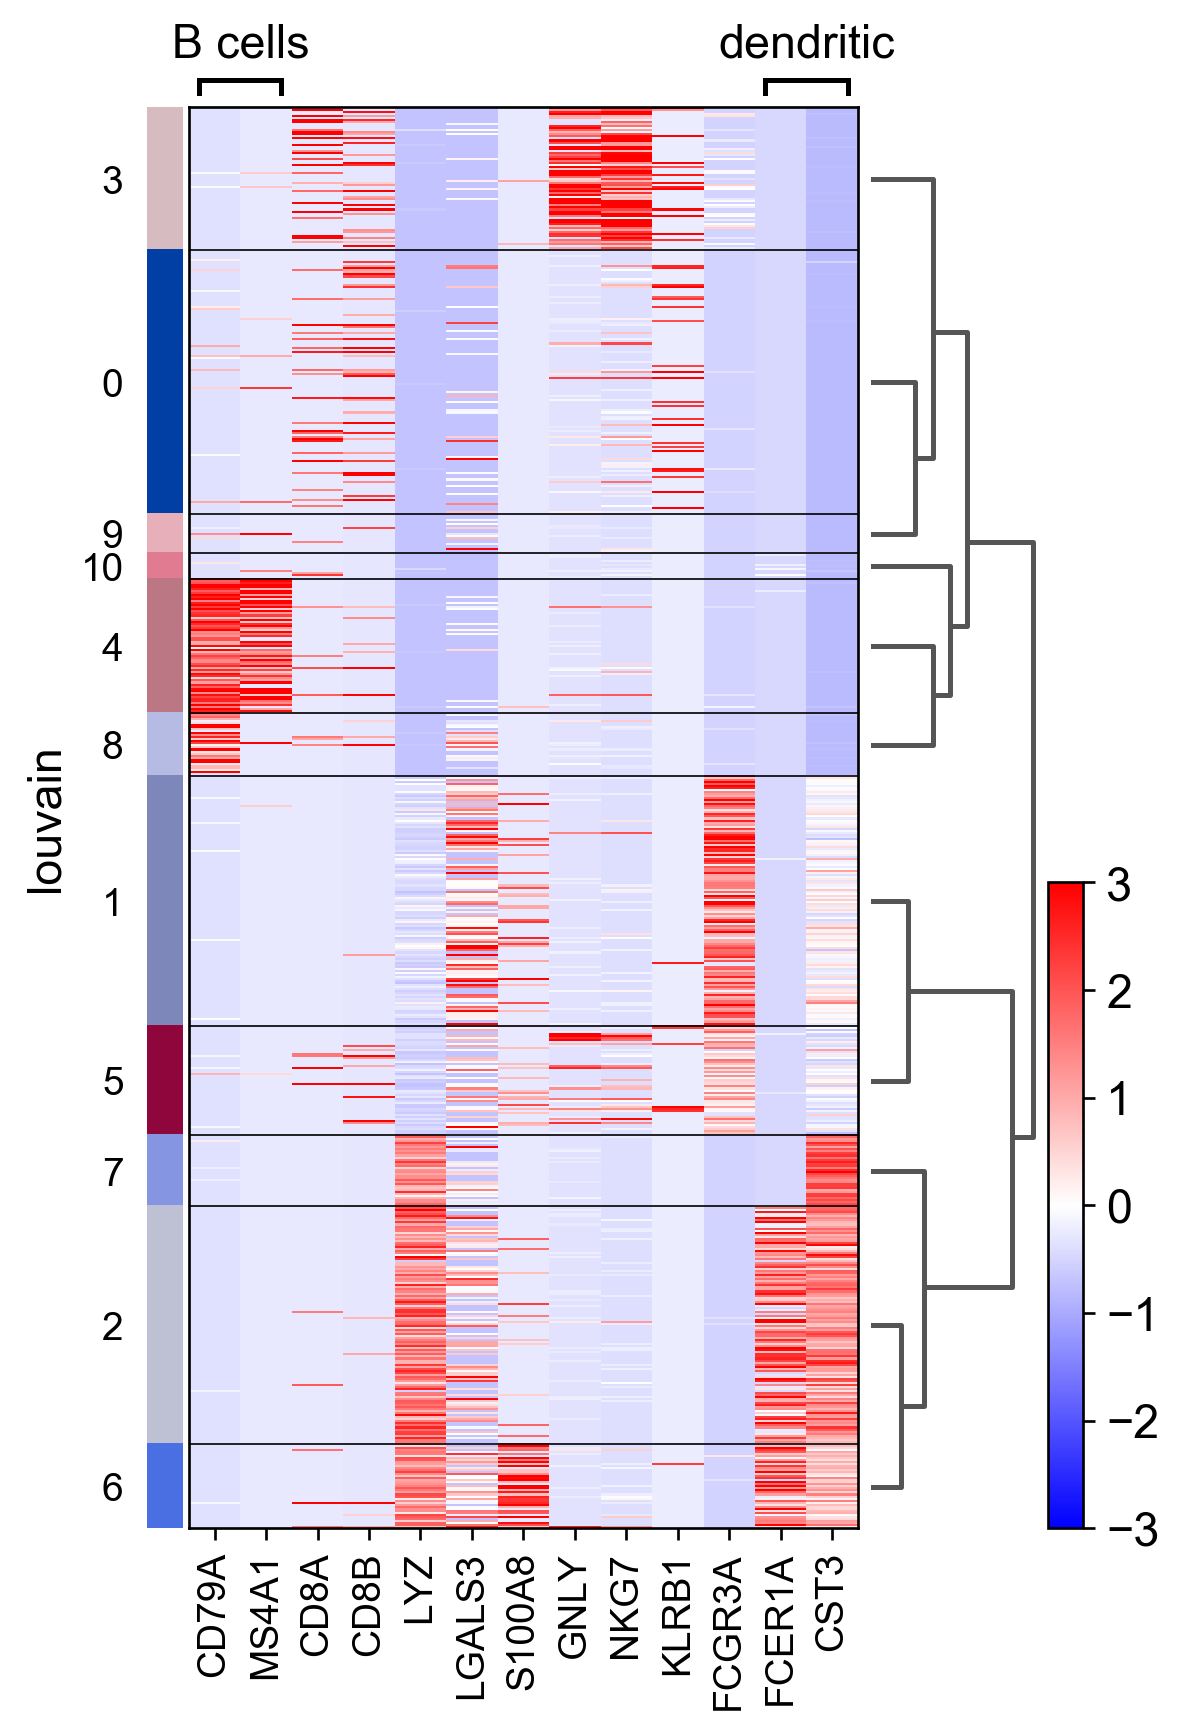

In [26]:
ax = sc.pl.heatmap(pbmc, marker_genes, groupby='louvain', figsize=(5, 8),
              var_group_positions=[(0,1), (11, 12)], use_raw=False, vmin=-3, vmax=3, cmap='bwr',
              var_group_labels=['B cells', 'dendritic'], var_group_rotation=0, dendrogram='dendrogram_louvain')

## Tracksplot

#### The track plot shows the same information as the heatmap, but, instead of a color scale, the gene expression is represented by height.

In [27]:
# Track plot data is better visualized using the non-log counts
import numpy as np
ad = pbmc.copy()
ad.raw.X.data = np.exp(ad.raw.X.data)

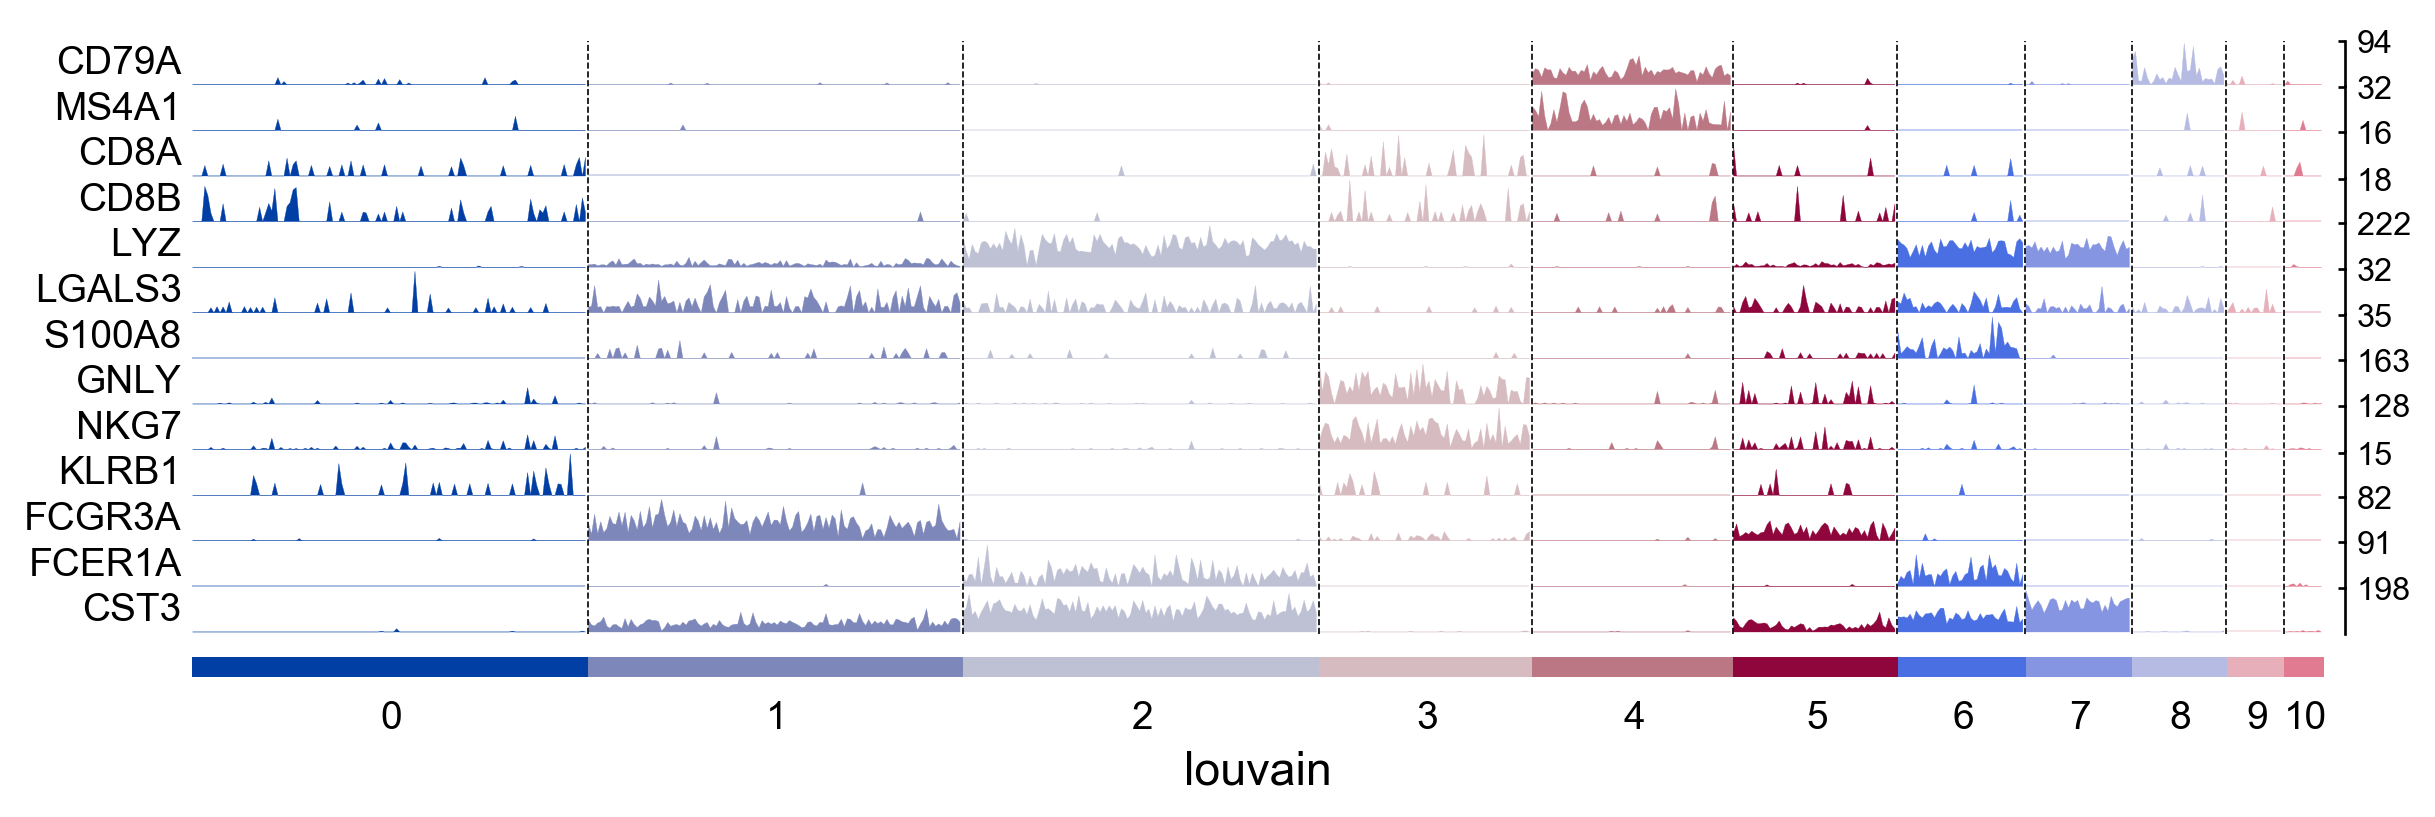

In [28]:
ax = sc.pl.tracksplot(ad,marker_genes, groupby='louvain')